<a href="https://colab.research.google.com/github/vaibhavmishra1/Deep_Learning_with_Keras/blob/master/kaggle_cat_and_dog_classification_scratch_and_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!	wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/3362/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1565093886&Signature=QwAtuMO7%2BVol31dkrb4Zc388%2FGcpkFmMZzI6tODPy6g6AINCVVeQd5EM6J6MX5Rldi10iPTwPcyxnVW7dqJtPUaJLYwNStcoLOp3TmQNHMU1dFOqEB3gPTfCUnnD2NktbLDyOcxA1dcHcRyjC%2FqxCbtHhzey25f29UWDP1YNvPZgd4vgMRORMLPllyJYJ6ekEAzyN0qDbBHjYNVaoPCpgtb%2B6Bb%2B8QLNjbA6N0PTCaNmh0Rd%2Bi%2FzXyPInercRzR0BHAJ9yRoti5mNiSB2AX5%2FjgFsm3oYTC8np5QNx4kHJgQZ%2B3lVAaU5n82bTewwkOzx%2BDifOFb0TNuS967TuKWtQ%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip" -O "dogs-vs-cats.zip" -c

--2019-08-03 13:20:09--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/3362/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1565093886&Signature=QwAtuMO7%2BVol31dkrb4Zc388%2FGcpkFmMZzI6tODPy6g6AINCVVeQd5EM6J6MX5Rldi10iPTwPcyxnVW7dqJtPUaJLYwNStcoLOp3TmQNHMU1dFOqEB3gPTfCUnnD2NktbLDyOcxA1dcHcRyjC%2FqxCbtHhzey25f29UWDP1YNvPZgd4vgMRORMLPllyJYJ6ekEAzyN0qDbBHjYNVaoPCpgtb%2B6Bb%2B8QLNjbA6N0PTCaNmh0Rd%2Bi%2FzXyPInercRzR0BHAJ9yRoti5mNiSB2AX5%2FjgFsm3oYTC8np5QNx4kHJgQZ%2B3lVAaU5n82bTewwkOzx%2BDifOFb0TNuS967TuKWtQ%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851576569 (812M) [application/zip]
Saving to: ‘dogs-vs-cats.zip’

dogs-vs-cats.zip    100%[===================>] 81

In [2]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [3]:
!unzip test1.zip
!unzip train.zip

Archive:  test1.zip
   creating: test1/
  inflating: test1/1.jpg             
  inflating: test1/10.jpg            
  inflating: test1/100.jpg           
  inflating: test1/1000.jpg          
  inflating: test1/10000.jpg         
  inflating: test1/10001.jpg         
  inflating: test1/10002.jpg         
  inflating: test1/10003.jpg         
  inflating: test1/10004.jpg         
  inflating: test1/10005.jpg         
  inflating: test1/10006.jpg         
  inflating: test1/10007.jpg         
  inflating: test1/10008.jpg         
  inflating: test1/10009.jpg         
  inflating: test1/1001.jpg          
  inflating: test1/10010.jpg         
  inflating: test1/10011.jpg         
  inflating: test1/10012.jpg         
  inflating: test1/10013.jpg         
  inflating: test1/10014.jpg         
  inflating: test1/10015.jpg         
  inflating: test1/10016.jpg         
  inflating: test1/10017.jpg         
  inflating: test1/10018.jpg         
  inflating: test1/10019.jpg         
  inflatin

In [7]:
!pwd

/content


In [0]:
import os,shutil
original_dataset_dir='train'
base_dir='cats_and_dogs_small/'
os.mkdir(base_dir)


In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: ignored

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
  fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)
  fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
  fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
  fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0803 13:22:59.414025 140528380790656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 13:22:59.456532 140528380790656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 13:22:59.463111 140528380790656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 13:22:59.491508 140528380790656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0803 13:22:59.542775 1405283

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

W0803 13:23:02.517626 140528380790656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 13:23:02.524945 140528380790656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0803 13:23:02.531506 140528380790656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')


train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6934 - acc: 0.5222 - val_loss: 0.6848 - val_acc: 0.5406
Epoch 2/100
100/100 [==============================] - 25s 248ms/step - loss: 0.6839 - acc: 0.5528 - val_loss: 0.6631 - val_acc: 0.6108
Epoch 3/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6715 - acc: 0.5828 - val_loss: 0.6620 - val_acc: 0.5755
Epoch 4/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6519 - acc: 0.6284 - val_loss: 0.6271 - val_acc: 0.6488
Epoch 5/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6394 - acc: 0.6300 - val_loss: 0.6005 - val_acc: 0.6669
Epoch 6/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6228 - acc: 0.6541 - val_loss: 0.5955 - val_acc: 0.6791
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6193 - acc: 0.6563 -

In [0]:
model.save('cats_and_dogs_small_1.h5')


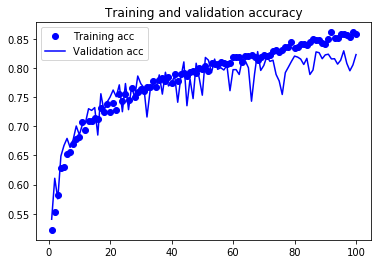

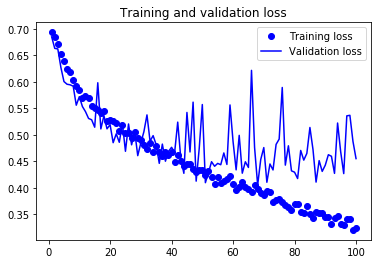

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [25]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [30]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 195ms/step - loss: 0.5902 - acc: 0.6940 - val_loss: 0.4397 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4792 - acc: 0.7690 - val_loss: 0.3705 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 18s 178ms/step - loss: 0.4360 - acc: 0.8025 - val_loss: 0.3290 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 18s 178ms/step - loss: 0.3987 - acc: 0.8295 - val_loss: 0.3104 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 17s 174ms/step - loss: 0.3967 - acc: 0.8225 - val_loss: 0.2958 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 18s 176ms/step - loss: 0.3784 - acc: 0.8275 - val_loss: 0.2806 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 17s 174ms/step - loss: 0.3737 - acc: 0.8330 - val_loss: 0.2733 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 1

Epoch 1/100
100/100 [==============================] - 20s 202ms/step - loss: 0.2734 - acc: 0.8790 - val_loss: 0.2381 - val_acc: 0.9070
Epoch 2/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2479 - acc: 0.8875 - val_loss: 0.2082 - val_acc: 0.9230
Epoch 3/100
100/100 [==============================] - 18s 179ms/step - loss: 0.2438 - acc: 0.9015 - val_loss: 0.2079 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2228 - acc: 0.9135 - val_loss: 0.2322 - val_acc: 0.9110
Epoch 5/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2116 - acc: 0.9150 - val_loss: 0.1977 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 18s 180ms/step - loss: 0.1873 - acc: 0.9210 - val_loss: 0.2142 - val_acc: 0.9160
Epoch 7/100
100/100 [==============================] - 18s 181ms/step - loss: 0.1775 - acc: 0.9325 - val_loss: 0.1948 - val_acc: 0.9210
Epoch 8/100
100/100 [===========================

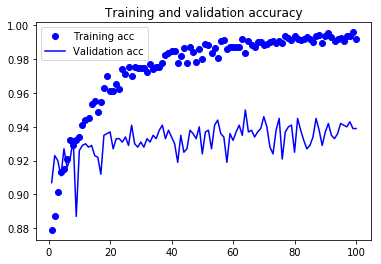

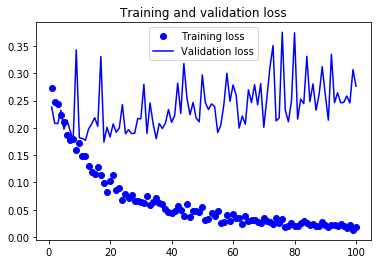

In [31]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [0]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)